## Part 1 - Exploratory Data Analysis

First, load the needed packages and modules into Python. Next, load the data into a pandas dataframe for ease of use.

In [1]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df_logins = pd.read_json('../data/logins.json')
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Aggregate the login time based on 15-minute time intervals.

In [4]:
df_logins.set_index('login_time', inplace=True)
df_logins['count'] = 1
df_logins = df_logins.resample('15T').count()
df_logins.reset_index(inplace=True)

In [5]:
df_logins.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [6]:
df_logins.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


Plot the dataset.

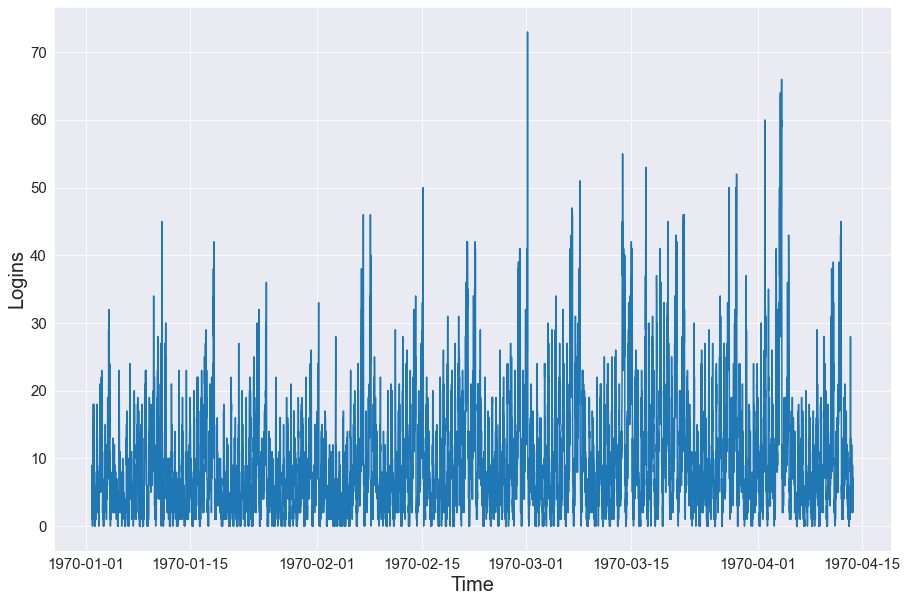

In [7]:
plt.figure(figsize = (15,10))
sns.lineplot(x='login_time', y='count', data=df_logins)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Logins', fontsize=20)
plt.show()

Plot the usage for each hour.

In [8]:
df_logins['hour'] = df_logins['login_time'].dt.hour
df_hour = df_logins.groupby('hour').sum().reset_index()

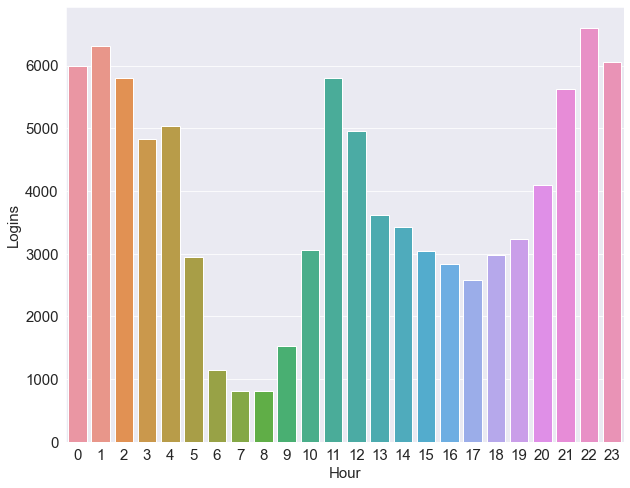

In [9]:
plt.figure(figsize = (10,8))
sns.barplot(x='hour', y='count', data=df_hour)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Logins', fontsize=15)
plt.show()

Seems the usage is much higher in the evernings but much lower in the early mornings.

Plot the usage for every day of the week.

In [10]:
df_logins['day'] = df_logins['login_time'].dt.dayofweek
df_day = df_logins.groupby('day').sum().reset_index()

In [11]:
df_day

,day,count,hour
0,0,8823,16140
1,1,9268,15456
2,2,10339,15456
3,3,11960,15800
4,4,15208,16560
5,5,19377,16560
6,6,18167,16560


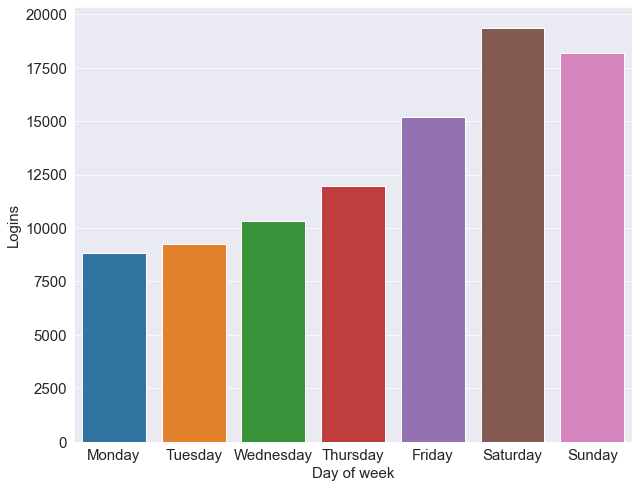

In [12]:
plt.figure(figsize = (10,8))
sns.barplot(x='day', y='count', data=df_day)
plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Day of week', fontsize=15)
plt.ylabel('Logins', fontsize=15)
plt.show()

Seems the usage is higher in the weekends (Friday to Sunday). 

## Part 2 - Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

#### 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

There are several metrics that can be used for the key measure of success of this experiment, including:
* how much of increase in driver partners in both cities; 
* decrease of traffic time. 

#### 2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

An A/B test would be useful for this experiment.

#### a) how you will implement the experiment

We need to collect the following data:
* The number of drive partners in both cities before and after the experiment. 
* The time it takes to drive between the two cities before and after the experiment. 

#### b) what statistical test(s) you will conduct to verify the significance of the observation

A null hypothesis test is conducted on the two variables to identify if there is any significance. The null hypothesis can be that there is no change for the two variables before and after the experiment. We can test the hypothesis for the two variables: 

Number of driver partners: We can select a rule of that how much increase of driver partners is considered to be significant. For example, we decide 10% is significant. Then, if the p-value of the increase of driver partners after the experiment is >= 10% of that before the experiment is larger than 5% (we use p=0.05 as significance level), we can reject the null hypothesis, and say that the experiment is succussful and is statistically significant.

Decrease of traffic time: We can select a rule of that how much decrease of traffic time is considered to be significant. For example, we decide decrease of 10 minutes is significant. Then, if the p-value of the decrease of traffic time after the experiment is >= 10 minutes of that before the experiment is larger than 5% (we use p=0.05 as significance level), we can reject the null hypothesis, and say that the experiment is succussful and is statistically significant.

#### c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

If any of the two null hypothesis is rejected, then we can assume the experiment is succussful. 

Other variables to be considered include the economic growth for the two cities, profit, and customer ratings. However, issurs could arise with free toll road, such as increase of traffic. So the city would revise the program if any issue arises.

## Part 3 - Predictive Modeling

### 3.1 Load Dataset

In [13]:
df = pd.read_json('../data/ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### 3.2 Data Wrangling

There are a few columns which have missing values. We need to handle those missing values.

##### Handle missing values for `avg_rating_of_driver` - fill in using median values

In [15]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median())

##### Handle missing values for `avg_rating_by_driver ` - fill in using median values

In [16]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median())

##### Handle missing values for `phone` - fill in using 'NA'

In [17]:
df['phone'] = df['phone'].fillna('NA')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


#### Question 1: Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [19]:
retain_first_30_days = len(df[df['trips_in_first_30_days'] > 0]) / len(df)
print(retain_first_30_days)

0.6922


#### In the first 30 days, there are 69% of users who are considered to be retained. 

In [20]:
df['last_trip_date'].max()

'2014-07-01'

The last trip date is 2014-07-01, so the last 30 days is June 2014.

In [21]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [22]:
retain_last_30_days = len(df[df['last_trip_date'] >= '2014-06-01']) / len(df)
print(retain_last_30_days)

0.37608


#### In the last 30 days, there are 38% of users who are considered to be retained. 

### 3.3 EDA

Create a new field which has the retained users in the 6th month (June 2014). 

In [23]:
df['retained'] = (df['last_trip_date'] >= '2014-06-01').astype(int)

In [24]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


Create he heat map to see the correlations between features.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'trips_in_first_30_days'),
  Text(0, 1.5, 'avg_rating_of_driver'),
  Text(0, 2.5, 'avg_surge'),
  Text(0, 3.5, 'surge_pct'),
  Text(0, 4.5, 'ultimate_black_user'),
  Text(0, 5.5, 'weekday_pct'),
  Text(0, 6.5, 'avg_dist'),
  Text(0, 7.5, 'avg_rating_by_driver'),
  Text(0, 8.5, 'retained')])

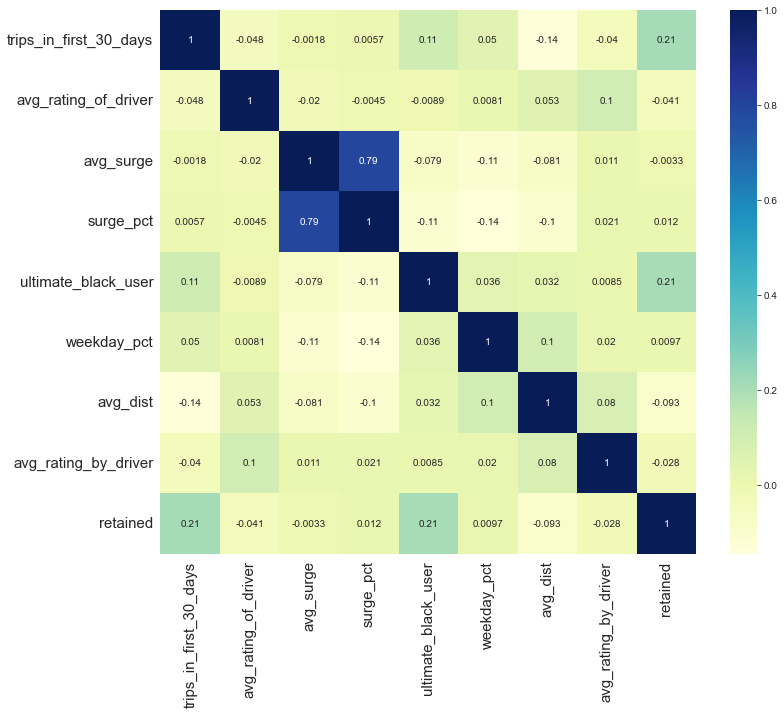

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

`trips_in_first_30_days` and `ultimate_black_user` have relatively higher correlation to the target: `retained`.

### 3.4 Pre-processing and Training

create dummies for `city` and `phone`. 

In [26]:
df_dummies = pd.get_dummies(df, columns=['city', 'phone'])

change True and False values in the `ultimate_black_user` column to 1 and 0.

In [27]:
df_dummies['ultimate_black_user'] = df_dummies['ultimate_black_user'].astype(int)

In [28]:
df_dummies.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_NA,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,0,1,0,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,0,1,0,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0,0


Next, we only want to keep the features that will be used in modeling. We will keep `trips_in_first_30_days`, `avg_rating_of_driver`, `avg_surge`, `surge_pct`, `ultimate_black_user`, `weekday_pct`, `avg_dist`, `	avg_rating_by_driver`, `city_Astapor`, `city_King's Landing`, `city_Winterfell`, `phone_Android`, `phone_NA`, `phone_iPhone`, and `retained` - which is the target.

In [29]:
df = df_dummies[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'ultimate_black_user', 
                'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'city_Astapor', "city_King's Landing", 
                'city_Winterfell', 'phone_Android', 'phone_NA', 'phone_iPhone', 'retained']]

In [30]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_NA,phone_iPhone,retained
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,0,1,0,0,0,1,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,1,0,0,1,0,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,1,0,0,0,0,1,0
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,0,1,0,0,0,1,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,1,1,0,0,0


Split the dataset to train and test datasets.

In [31]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)
print(train.shape, test.shape)

(35000, 15) (15000, 15)


### 3.5 Modeling

Use pycaret to find the best models.

In [32]:
from pycaret.classification import *
s = setup(data=df, target='retained', fold_shuffle=True, session_id=42)

,Description,Value
0,session_id,42
1,Target,retained
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(50000, 15)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7947,0.8615,0.6770,0.7530,0.7129,0.5538,0.5558,4.8680
lightgbm,Light Gradient Boosting Machine,0.7902,0.8601,0.6730,0.7453,0.7072,0.5444,0.5462,0.3200
xgboost,Extreme Gradient Boosting,0.7886,0.8553,0.6725,0.7422,0.7056,0.5413,0.5430,0.7490
gbc,Gradient Boosting Classifier,0.7875,0.8533,0.6674,0.7425,0.7029,0.5382,0.5402,0.9380
ada,Ada Boost Classifier,0.7825,0.8459,0.6569,0.7372,0.6946,0.5265,0.5287,0.3130
rf,Random Forest Classifier,0.7574,0.8241,0.6595,0.6849,0.6718,0.4795,0.4798,0.7440
et,Extra Trees Classifier,0.7505,0.8066,0.6665,0.6698,0.6680,0.4682,0.4683,0.8580
knn,K Neighbors Classifier,0.7479,0.7929,0.6325,0.6770,0.6539,0.4560,0.4567,0.2330
lr,Logistic Regression,0.7192,0.7611,0.4962,0.6726,0.5711,0.3694,0.3789,2.3180
ridge,Ridge Classifier,0.7190,0.0000,0.4773,0.6812,0.5612,0.3638,0.3763,0.0530


Overall, catboost gives the best morel results. Here we explore the settings for catboost model. 

In [34]:
catboost = create_model('catboost')
evaluate_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7854,0.8501,0.6730,0.7349,0.7026,0.5353,0.5365
1,0.7906,0.8570,0.6669,0.7494,0.7057,0.5440,0.5463
2,0.8034,0.8616,0.7003,0.7590,0.7285,0.5748,0.5760
3,0.7997,0.8708,0.6980,0.7522,0.7241,0.5673,0.5682
4,0.7869,0.8515,0.6571,0.7466,0.6990,0.5350,0.5376
5,0.7889,0.8572,0.6677,0.7451,0.7043,0.5409,0.5428
6,0.8009,0.8712,0.6725,0.7700,0.7179,0.5651,0.5682
7,0.7991,0.8637,0.6869,0.7575,0.7205,0.5643,0.5660
8,0.8014,0.8736,0.6861,0.7631,0.7226,0.5686,0.5706
9,0.7905,0.8579,0.6616,0.7524,0.7041,0.5430,0.5457


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

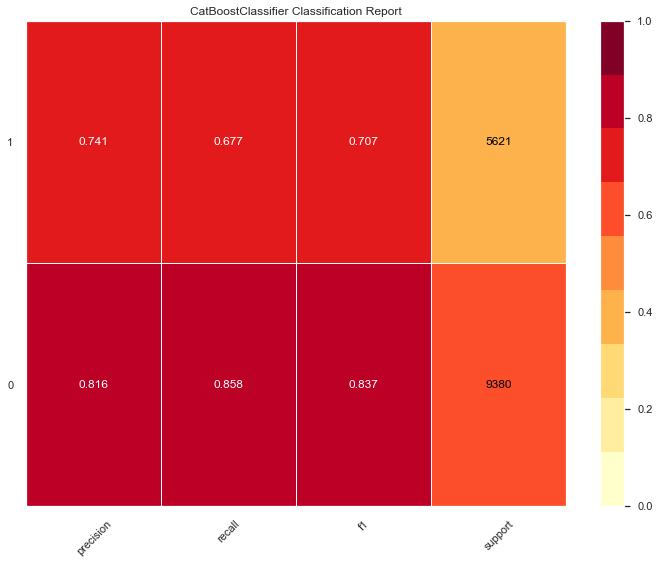

In [35]:
sns.set(rc = {'figure.figsize':(10,8)})
plot_model(catboost, plot = 'class_report')

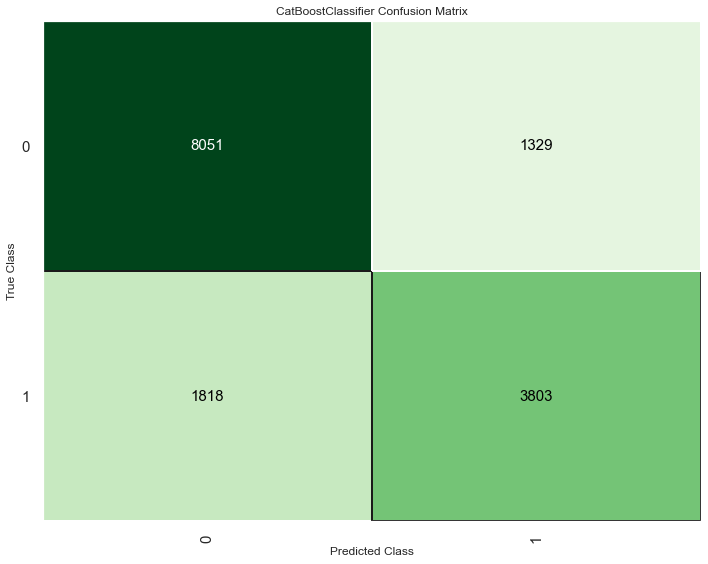

In [36]:
sns.set(rc = {'figure.figsize':(10,8)})
plot_model(catboost, plot = 'confusion_matrix')

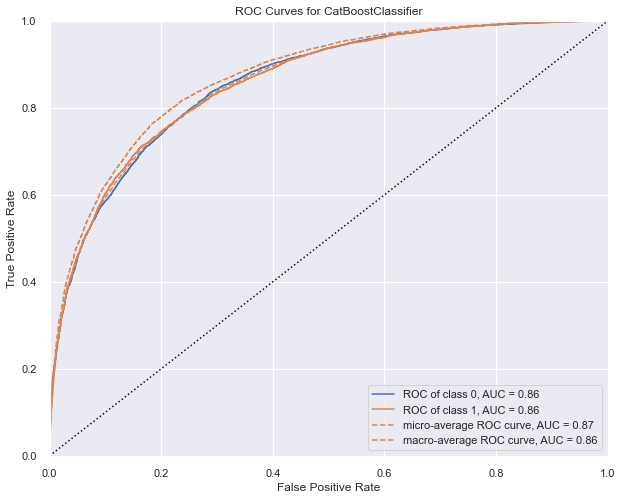

In [37]:
sns.set(rc = {'figure.figsize':(10,8)})
plot_model(catboost, plot = 'auc')

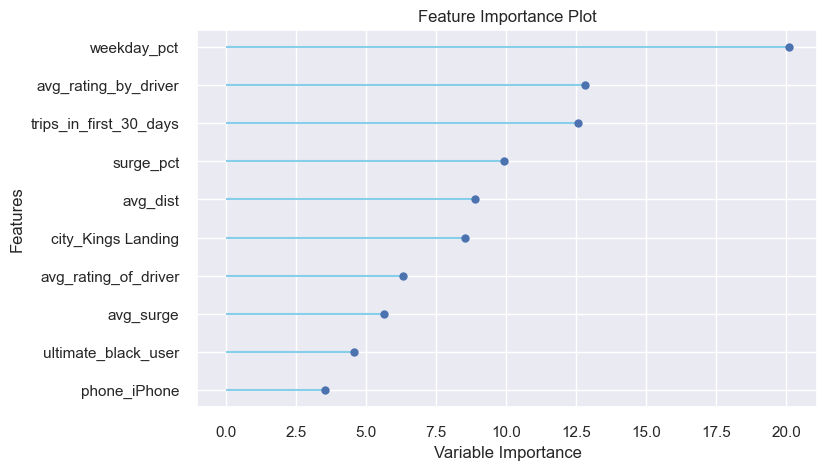

In [38]:
sns.set(rc = {'figure.figsize':(10,8)})
plot_model(catboost, plot = 'feature')

#### Question 2: Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

First, this is a classification problem, so we can use classification machine learning models. Pycaret helps identify the best model with the best results, which is catboost classifier. 

The accuracy value is 0.79, AUC value is 0.86. Those values indicate the catboost model is a very good model.

#### Question 3: Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

`ultimate_black_user`, `city_Astapor`, and `city_winterfell` are not the most important features, indicating that those users are not much retained. Ultimate could conduct more marketing for black user, and for users in the cities of Aspator and Winterfell to attract more retained users. 